## 1. Collecting the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('bankruptcy-prevention.csv')
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [3]:
# There is no null value in any of the columns

df.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

In [4]:
df.columns = df.columns.str.strip()

## 2. Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [6]:
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All the X-variable columns contain only three values i.e., 0, 0.5, and 1.0.

In [7]:
df['class'].value_counts()

class
non-bankruptcy    143
bankruptcy        107
Name: count, dtype: int64

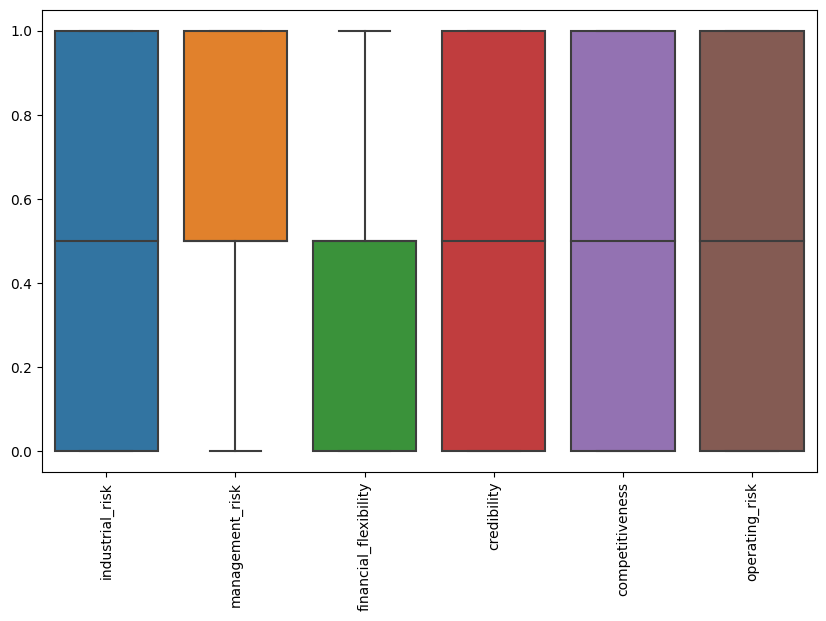

In [8]:
# Boxplot of all X - Variables

plt.figure(figsize=(10, 6))
sns.boxplot(df.iloc[:, :-1])
plt.xticks(rotation = 90)
plt.show()

C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cs833\AppData\Local\Temp\ipykernel_13944\1348102733.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\U

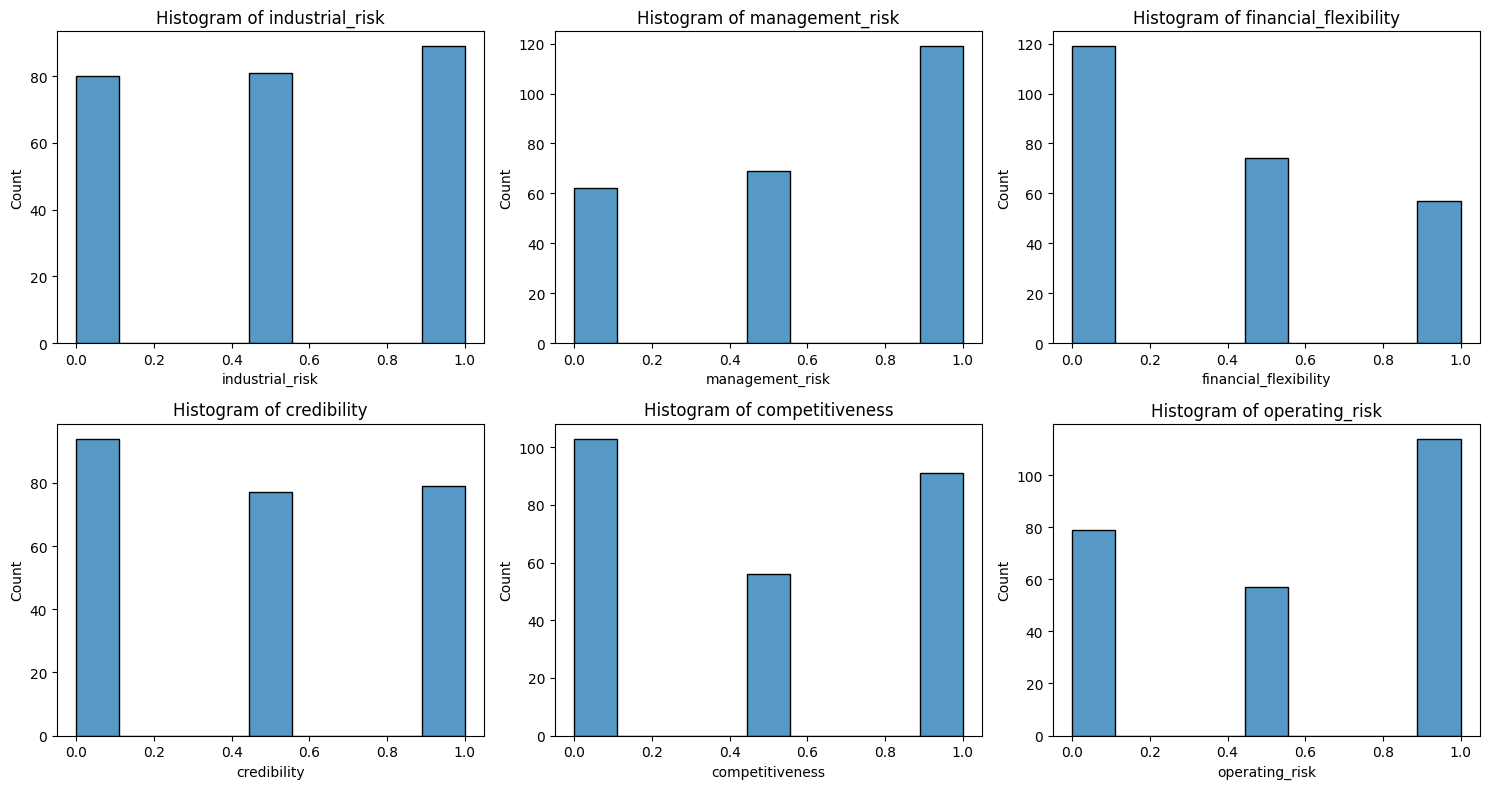

In [9]:
# Histogram of all the X - variables

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for i, column in enumerate(df.iloc[:, :-1]):
    row = i // 3
    col = i % 3
    sns.histplot(x=column, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Histogram of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Count')
    plt.tight_layout() 


plt.show()

C:\Users\cs833\AppData\Local\Temp\ipykernel_13944\2541142309.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\cs833\AppData\Local\Temp\ipykernel_13944\2541142309.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\cs833\AppData\Local\Temp\ipykernel_13944\2541142309.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\cs833\AppData\Local\Temp\ipykernel_13944\2541142309.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\cs833\AppData\Local\Temp\ipykernel_13944\2541142309.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


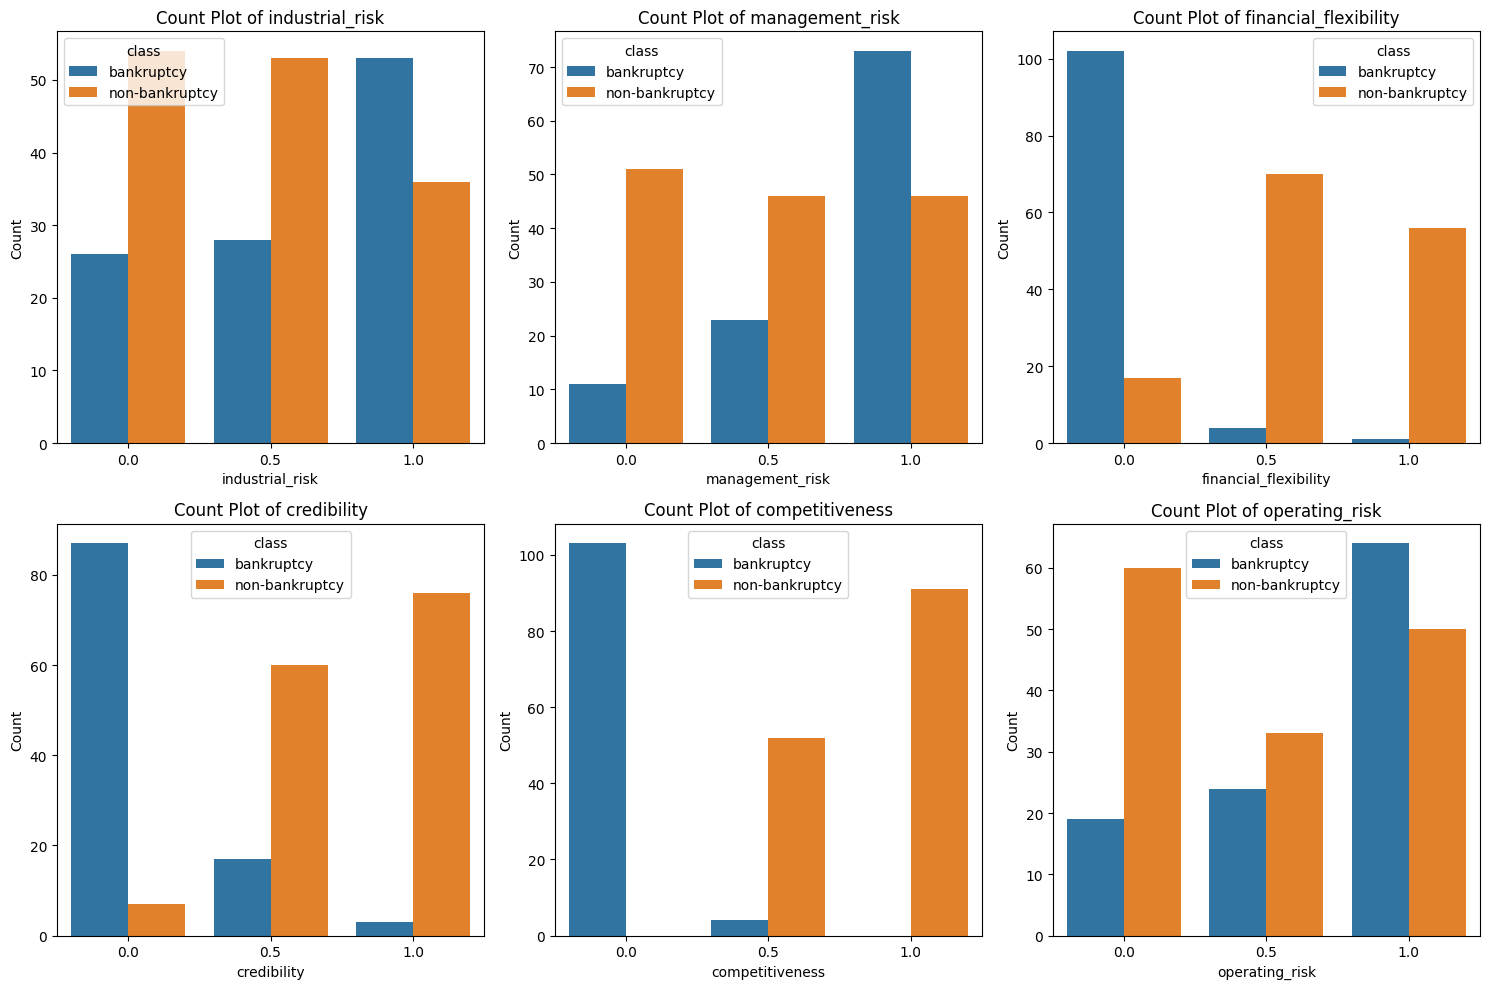

In [10]:
# Countplot of all X-variables
 
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, column in enumerate(df.iloc[:, :-1]):
    row = i // 3
    col = i % 3
    sns.countplot(x=column, data=df, ax=axes[row, col], hue = 'class')
    axes[row, col].set_title(f'Count Plot of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Count')
    plt.tight_layout() 

plt.show()

C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

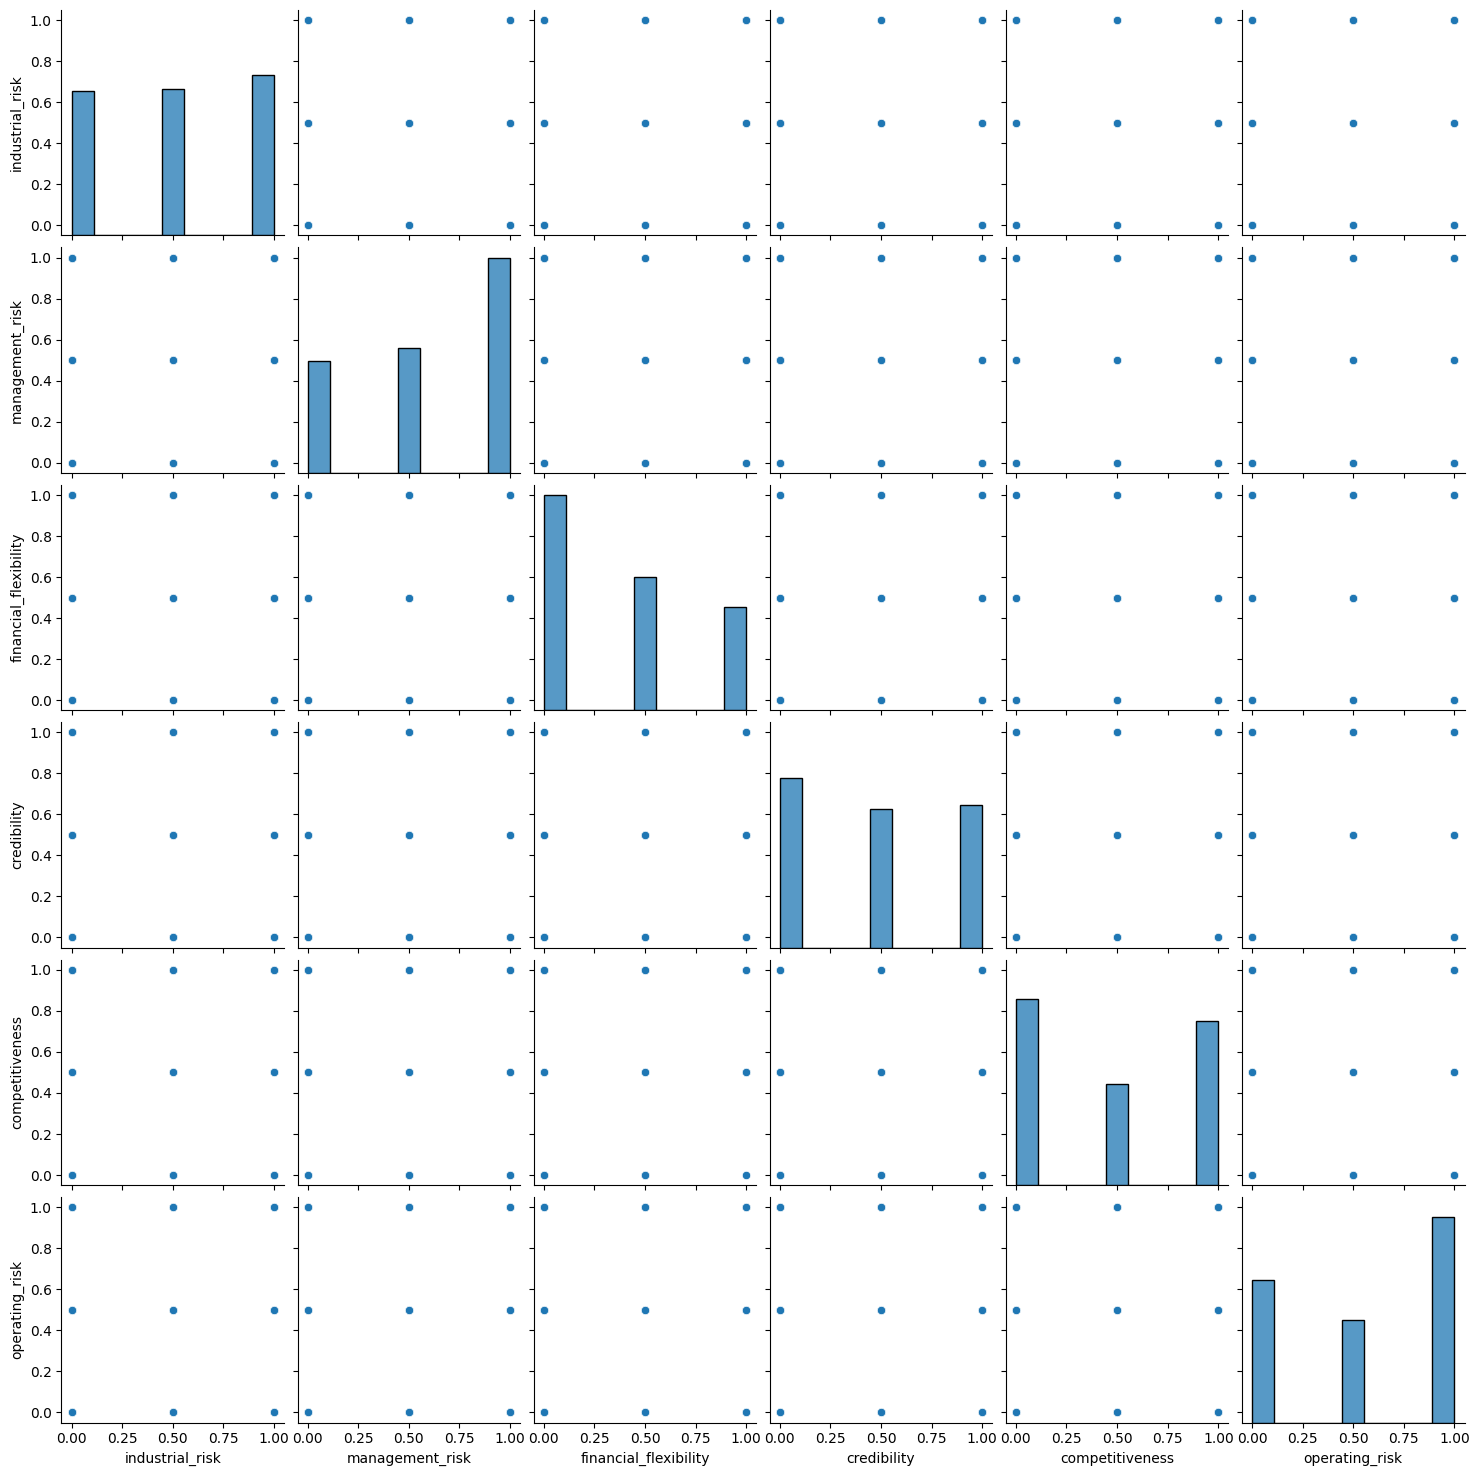

In [11]:
# Pair plot of X-variables
sns.pairplot(df)
plt.show()

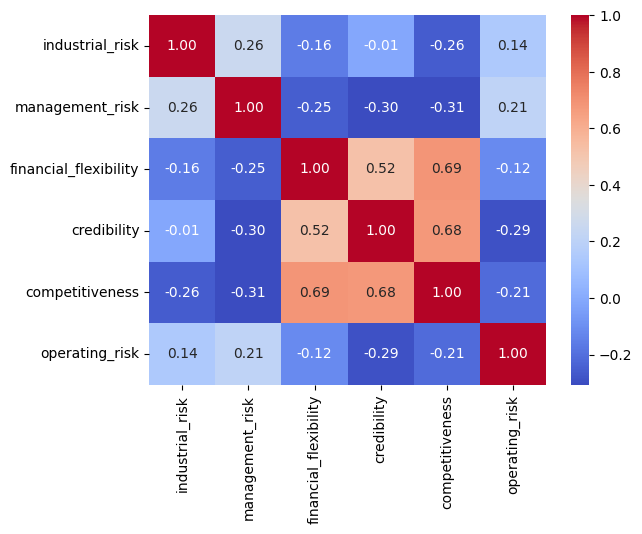

In [12]:
correlation = df.iloc[:, :-1].corr()

sns.heatmap(data = correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

## 3. Data Transformation

In [13]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['class'] = le.fit_transform(df[['class']])
df.head()

C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


## 4. Data Partition

In [14]:
X = df.iloc[:, :-1]
Y = df[['class']]

# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 10)

## 5. Model Fitting

#### 1. Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, Y_train)

C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [16]:
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score

ac1 = accuracy_score(Y_train, Y_pred_train)
print("Training accuracy score:", round(ac1, 2))

ac2 = accuracy_score(Y_test, Y_pred_test)
print('Test accuracy score:', round(ac2, 2))

Training accuracy score: 0.99
Test accuracy score: 1.0


In [18]:
# Cross Validation

training_acc = []
test_acc = []

for i in range(1, 200):
    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=i)
    model.fit(X_train, Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_acc.append(accuracy_score(Y_train, Y_pred_train))
    test_acc.append(accuracy_score(Y_test, Y_pred_test))

import numpy as np
print('Cross Validation - Training accuracy', round(np.mean(training_acc), 3))
print('Cross Validation - Testing accuracy', round(np.mean(test_acc), 3))


C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was pass

Cross Validation - Training accuracy 0.996
Cross Validation - Testing accuracy 0.996


C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was pass

In [19]:
# Confusion matrix

from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(Y_train, Y_pred_train)
cm2 = confusion_matrix(Y_test, Y_pred_test)

print('Confusion matrix for Training data:\n', cm1)
print('Confusion matrix for Testing data:\n', cm2)

Confusion matrix for Training data:
 [[76  1]
 [ 0 98]]
Confusion matrix for Testing data:
 [[30  0]
 [ 0 45]]


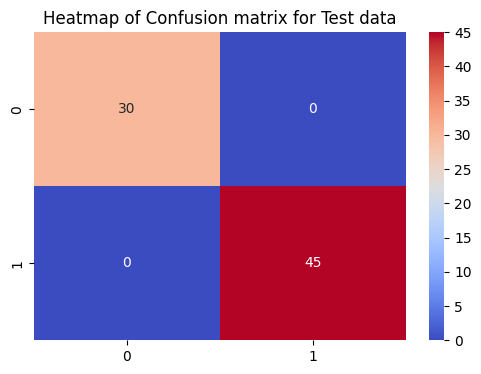

In [20]:
# Heatmap of confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm2, cmap='coolwarm', annot=True, fmt='g')
plt.title('Heatmap of Confusion matrix for Test data')
plt.show()

In [21]:
# Recall / Sensitivity, Precision, F1 score

from sklearn.metrics import recall_score, precision_score, f1_score

print('Accuracy Score:', round(ac2, 3))
print('Sensitivity Score:', recall_score(Y_test, Y_pred_test).round(3))
print('Precision Score:', precision_score(Y_test, Y_pred_test).round(3))
print('F1 Score:', f1_score(Y_test, Y_pred_test).round(3))

TN = cm2[0, 0]
FP = cm2[0, 1]
TNR = TN / (TN + FP)

print('Specificity:', TNR.round(3))

Accuracy Score: 1.0
Sensitivity Score: 1.0
Precision Score: 1.0
F1 Score: 1.0
Specificity: 1.0


In [22]:
Y_pred_proba = model.predict_proba(X_test)[:, 1]

In [23]:
# ROC Curve

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, dum = roc_curve(Y_test, Y_pred_proba)
auc_score = roc_auc_score(Y_test, Y_pred_proba)
print('AUC Score:', auc_score)

AUC Score: 1.0


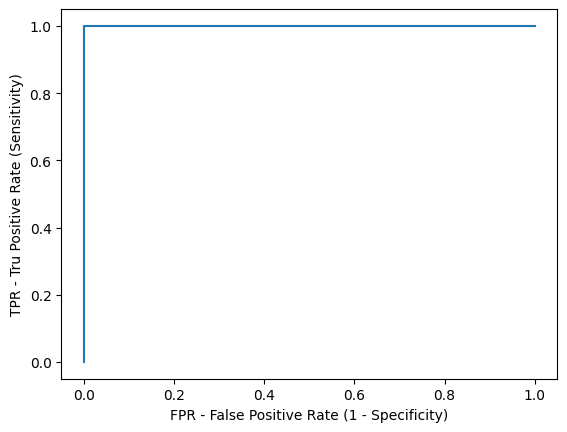

In [24]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.xlabel('FPR - False Positive Rate (1 - Specificity)')
plt.ylabel('TPR - Tru Positive Rate (Sensitivity)')
plt.show()

#### 2. KNN Classifier

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [27]:
# Model Fitting

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train.values, Y_train)

Y_pred_train = model.predict(X_train.values)
Y_pred_test = model.predict(X_test.values)

C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [28]:
# Metrics

from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
print("Training Accuracy score:" , ac1.round(3))

ac2 = accuracy_score(Y_test,Y_pred_test)
print("Test Accuracy score:" , ac2.round(3))

Training Accuracy score: 0.99
Test Accuracy score: 1.0


In [29]:
# Cross Validation

training_acc = []
test_acc = []

for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=i)
    model.fit(X_train.values,Y_train)
    Y_pred_train = model.predict(X_train.values)
    Y_pred_test  = model.predict(X_test.values)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validation - Training accuracy:" ,np.mean(training_acc).round(2))
print("Cross validation - Test accuracy:" ,np.mean(test_acc).round(2))

C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was

Cross validation - Training accuracy: 1.0
Cross validation - Test accuracy: 0.99


In [30]:
training_accuracy_list = []
test_accuracy_list = []

for k in range(5, 18, 2):
    training_accuracy = []
    test_accuracy = []

    for i in range(1, 100, 1):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=i)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train.values, Y_train)
        y_pred_train = knn.predict(X_train.values)
        y_pred_test = knn.predict(X_test.values)
        training_accuracy.append(accuracy_score(Y_train, y_pred_train))
        test_accuracy.append(accuracy_score(Y_test, y_pred_test))

    training_accuracy_list.append(np.mean(training_accuracy).round(2))
    test_accuracy_list.append(np.mean(test_accuracy).round(2))

print("Training Accuracies:", training_accuracy_list)
print("Test Accuracies:", test_accuracy_list)

C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was

Training Accuracies: [1.0, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99]
Test Accuracies: [0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99]


C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\cs833\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was

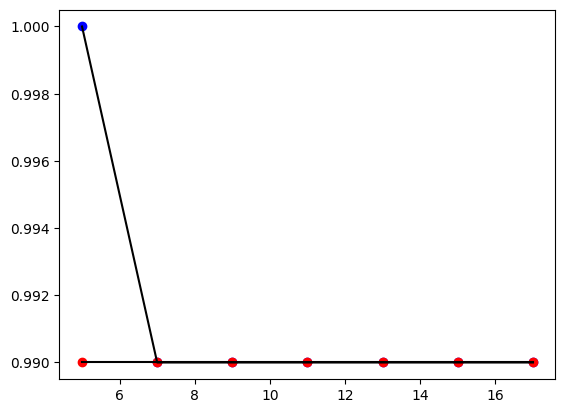

In [31]:
import matplotlib.pyplot as plt

# Blue dots belong to Training accuracies
plt.scatter(range(5, 18, 2),training_accuracy_list,color='blue')
plt.plot(range(5, 18, 2),training_accuracy_list,color='black')

# Red dots belong to testing accuracies
plt.scatter(range(5, 18, 2),test_accuracy_list,color='red')
plt.plot(range(5, 18, 2),test_accuracy_list,color='black')
plt.show()

As the variance between the train accuracy and test accuracy is having comparatively less. We can consider K = 5 neighbors.